# ML в Биологии
## Random Forest. Part I.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import scipy.stats
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

sns.set(context='poster')
%matplotlib inline

### Задача 1:

Скачайте датасет про классификацию женщин с диабетом. Разделите на трейн и тест.

In [3]:
!unzip archive

Archive:  archive.zip
  inflating: diabetes.csv            


In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Обучите обычное решающее дерево глубины 3. Выведите его графическое представление, а также accuracy на тренировочной и тестовой выборке.

In [11]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Посчитайте accuracy

In [12]:
print(f'Train accuracy = {accuracy_score(y_train, tree.predict(X_train))}')
print(f'Test accuracy = {accuracy_score(y_test, tree.predict(X_test))}')

Train accuracy = 0.7951582867783985
Test accuracy = 0.7619047619047619


Визуализируйте дерево

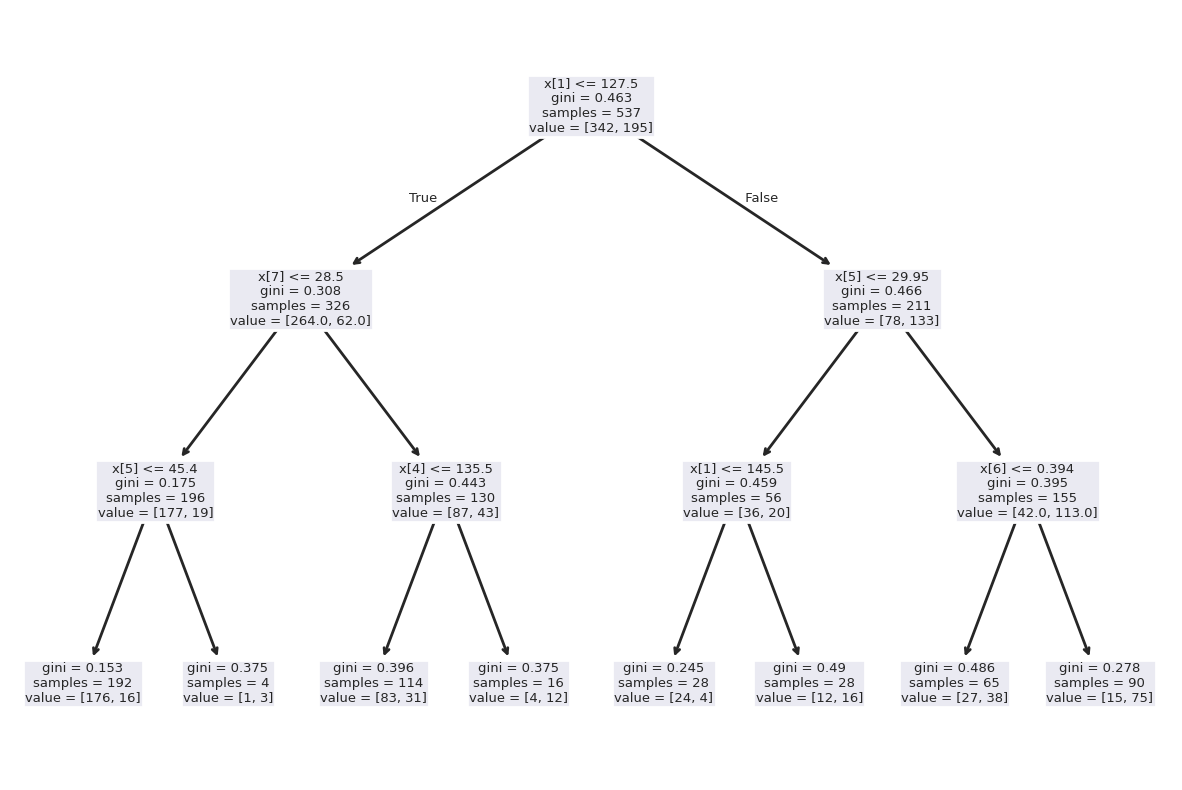

In [13]:
plt.figure(figsize=(15, 10))
plot_tree(tree)
plt.show()

Теперь обучите случайный лес с 100 деревьями.

In [16]:
n_estimators = 100

forest = RandomForestClassifier(n_estimators=n_estimators)

forest.fit(X_train, y_train)

RandomForestClassifier()

Выведите параметры леса.

In [17]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Какие параметры уже известны и относятся к решающему дереву?

**Ответ:**

Проще перечислить те, которые уже к лесу относятся: `bootstrap`, `n_estimators`, `n_jobs`, `oob_score`, `verbose`, `warm_start`



Появляются новые важные гиперпараметры: n_estimators (количество деревьев в лесу). Также важным является гиперапараметр max_features &mdash; максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева. Перед каждым разбиением дерева генерируется выборка из `min(k, max_features)` случайных признаков (`k` — количество признаков в датасете) и только эти признаки рассматриваются как разделяющие в данной вершине.

Выведите качество, сравните с деревом.

In [19]:
print(f'Train accuracy = {accuracy_score(y_train, forest.predict(X_train))}')
print(f'Test accuracy = {accuracy_score(y_test, forest.predict(X_test))}')

Train accuracy = 1.0
Test accuracy = 0.7619047619047619


**Вывод:**

 Видно явное переобучение, так как на train лес выучил все, на test стало лучше, но не очень сильно


Нарисуйте первые 6 деревьев леса.

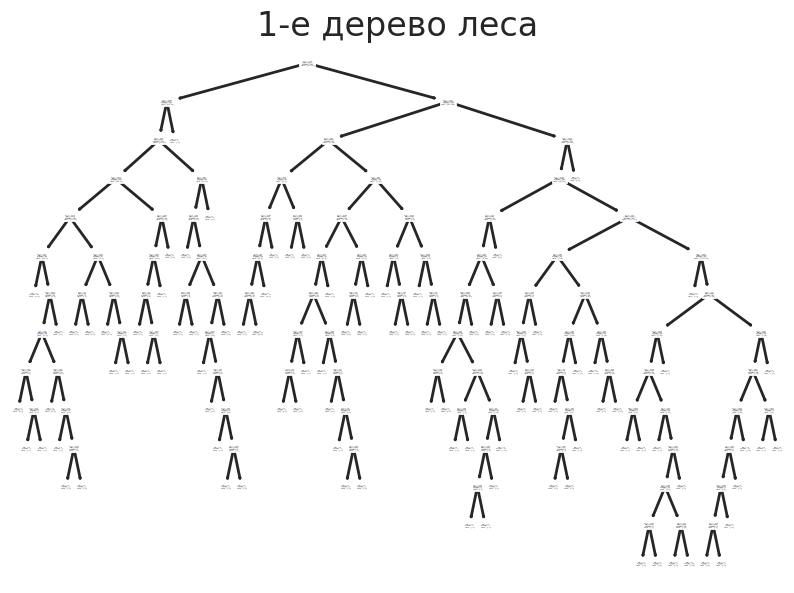

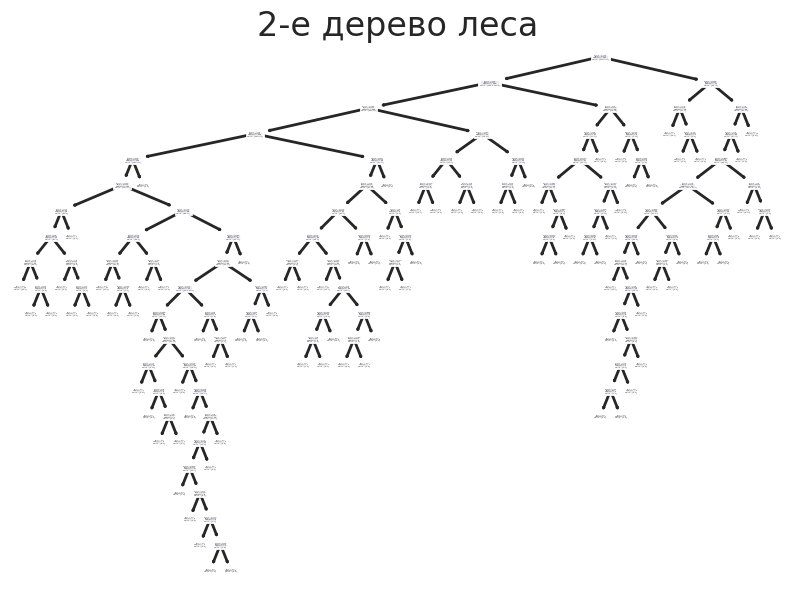

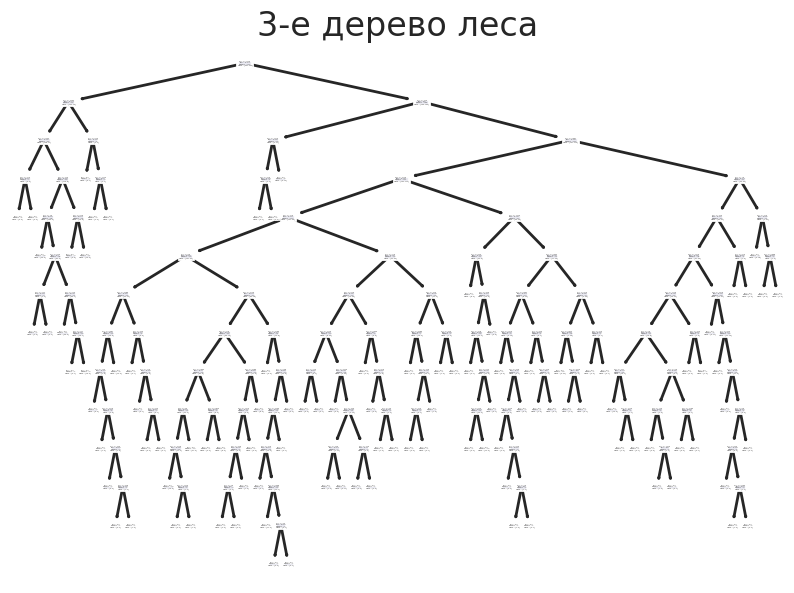

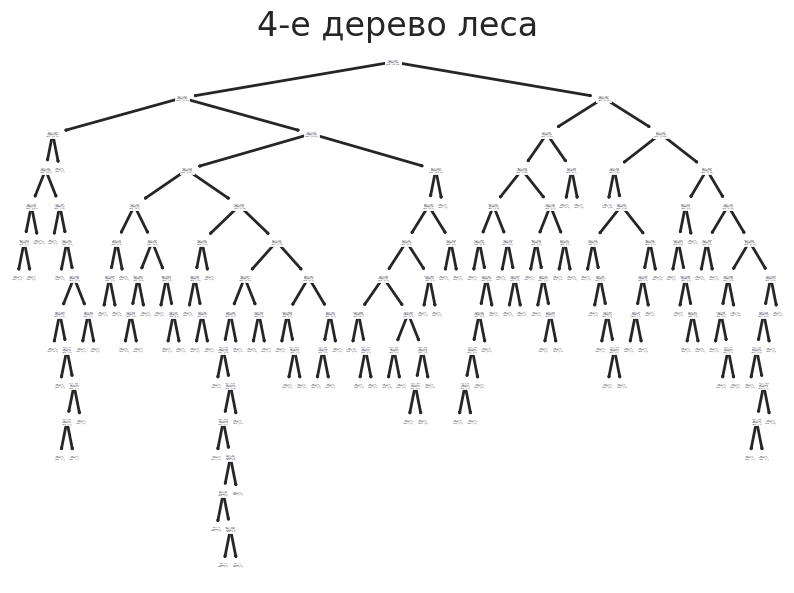

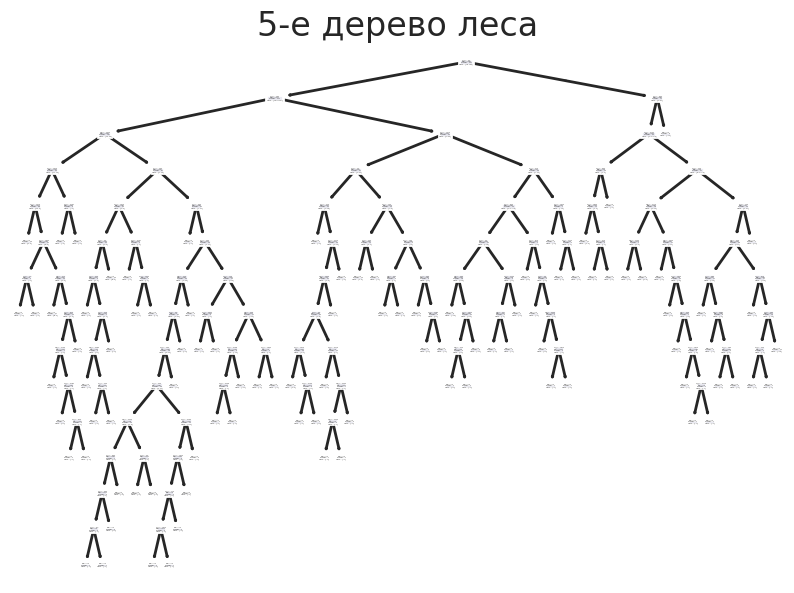

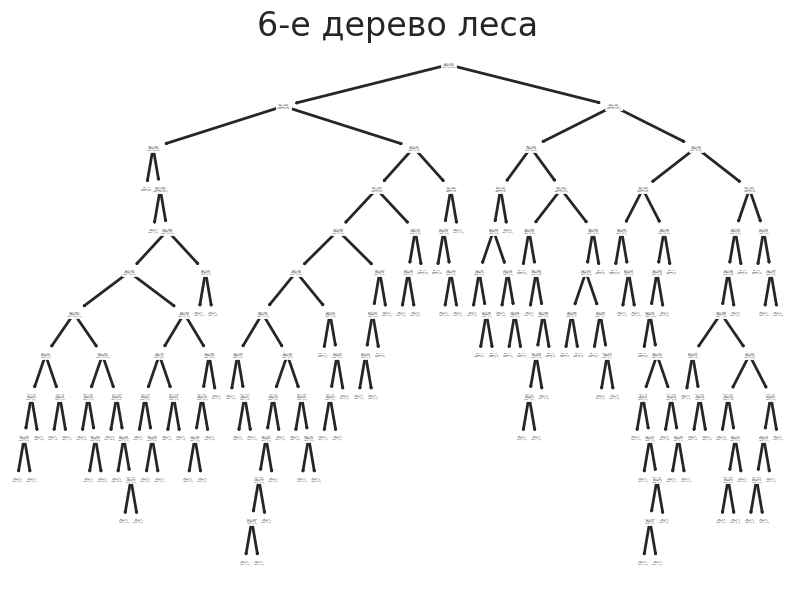

In [20]:
i = 1
for tree_in_forest in forest.estimators_:
    plt.figure(figsize=(10, 7))
    plot_tree(tree_in_forest)
    plt.title(f'{i}-е дерево леса')
    plt.show()
    i += 1
    if i > 6:
        break

Как выглядят деревья в решающем дереве? Насколько они отличаются от обученного ранее дерева и друг от друга?

**Вывод:**

Каждое дерево в лесу имеет большую глубину и сложную структуру (в отличие от ранее построенного дерева). При этом каждое дерево ветвится по-своему, с разной глубиной, но все они довольно объёмные. Параметры каждой вершины трудно различимы из-за обилия узлов и мелкого текста.